In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

%matplotlib notebook


In [ ]:
cmap_bold = ListedColormap(["#FF0000","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBBBFF"])

In [ ]:
def sigmoid(h):
    
    return 1/(1 + np.exp(-h))

def cross_entropy(y,p_hat):
    
    return -(1/len(y))*np.sum(y*np.log(p_hat) + (1-y) * np.log(1-p_hat))

def accuracy(y,y_hat):
    
    return np.mean(y==y_hat)

In [ ]:
class LogisticRegression():
    
    def __init__(self, thresh = 0.5):
        
        self.thresh = thresh
        self.w = None
        self.b = None
        
    def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
        
        epochs = int(epochs)
        N,D = X.shape
        J =  np.zeros(epochs)
        self.w = np.random.randn(D)
        self.b = np.random.rand(1)
        
        for epoch in range(epochs):
            
            p_hat = self.__forward(X)
            J[epoch] = cross_entropy(y, p_hat)
            self.w -= eta * (1 / N) * X.T @ (p_hat - y)
            self.b -= eta * (1 / N) * np.sum(p_hat - y)
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve')
            plt.show()
            
    def __forward(self,X):
        
        return sigmoid(X@self.w+self.b)
    
    def predict(self, X):
        
        x = np.linspace(-2,2,10)
        y = np.linspace(-2,2,10)

        X0,Y0 = np.meshgrid(x,y)
        Z = (self.b - self.w[0]*X0 - self.w[1]*Y0) / self.w[2]
        
        y0 =(self.__forward(X) >= self.thresh).astype(np.int32)
        
        fig = plt.figure(figsize =(10,9))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:,0], X[:,1], X[:,2], c = y0, alpha = .6)
        ax.plot_surface(X0, Y0, Z)
        plt.show()
        
        return (self.__forward(X) >= self.thresh).astype(np.int32)

In [ ]:
def main():
    
    N = 1000
    D = 3
    
    X0 = np.random.randn((N//2),D)+np.array([1,1,-1])
    X1 = np.random.randn((N//2),D)+np.array([-1,-1,1])
    X = np.vstack((X0,X1))
    
    y = np.array([0] * (N // 2) + [1] * (N//2))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c = y, alpha = .6)
    plt.show()
    
    df = pd.DataFrame(X)
    df = pd.concat([df,pd.DataFrame(y)], axis = 1)
    
    df.to_csv("LogRegData1.csv")
    
    log_reg = LogisticRegression()
    log_reg.fit(X, y, eta = 1e-2, show_curve = True, epochs=1e3)
    y_hat = log_reg.predict(X)
    
    print(f"trining Accuracy: {accuracy(y,y_hat):0.4f}")
    
   

<IPython.core.display.Javascript object>


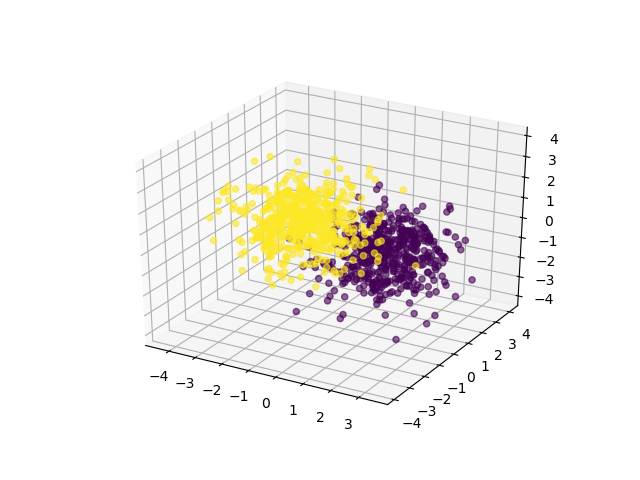

<IPython.core.display.Javascript object>


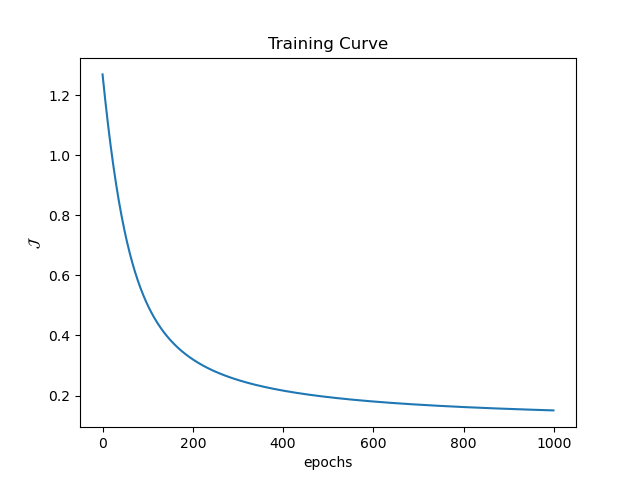

<IPython.core.display.Javascript object>


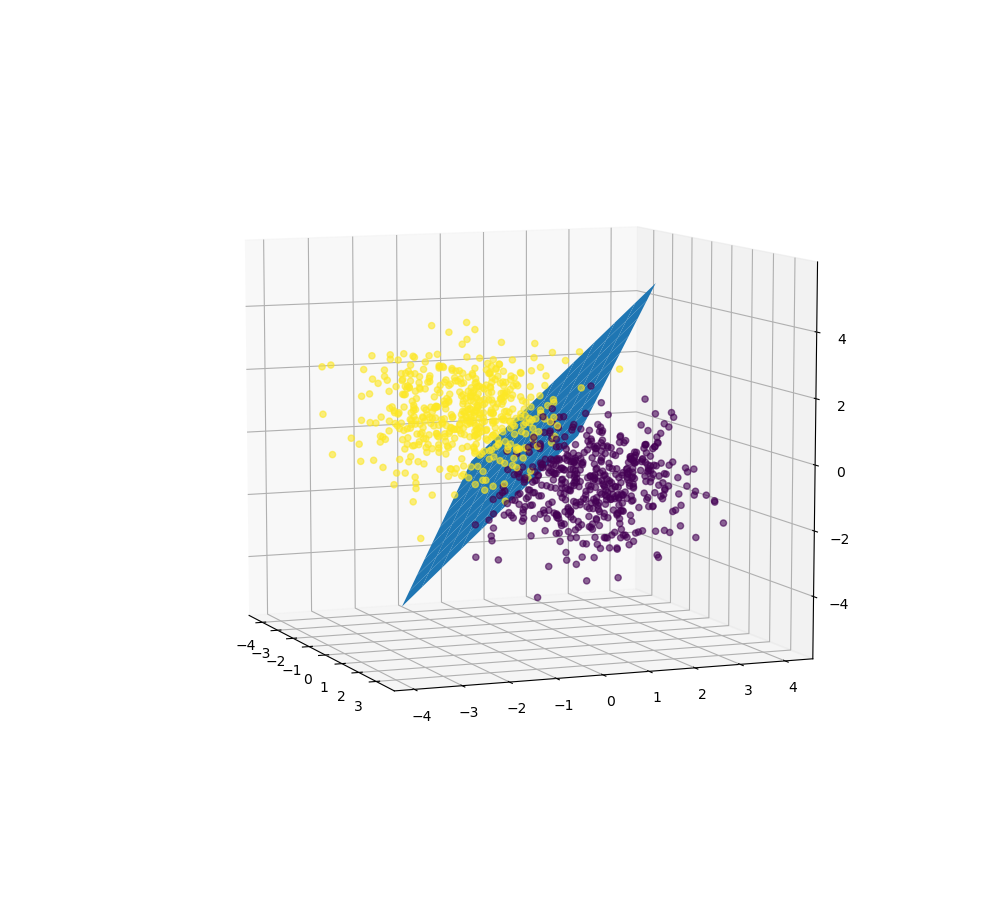

trining Accuracy: 0.9540


In [ ]:
if __name__ == "__main__":
     main()